<a href="https://colab.research.google.com/github/harnalashok/hadoop/blob/main/Recommendation_Engine_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 19th Nov, 2021
# My folder: /home/ashok/Documents/spark/6.recommender_system
# Ref: https://github.com/snehalnair/als-recommender-pyspark/blob/master/Recommendation_Engine_MovieLens.ipynb
#      https://towardsdatascience.com/build-recommendation-system-with-pyspark-using-alternating-least-squares-als-matrix-factorisation-ebe1ad2e7679
#      https://developers.google.com/machine-learning/recommendation
#
# How does Netflix recommender system work:
#      https://help.netflix.com/en/node/100639
#



# Recommender Systems

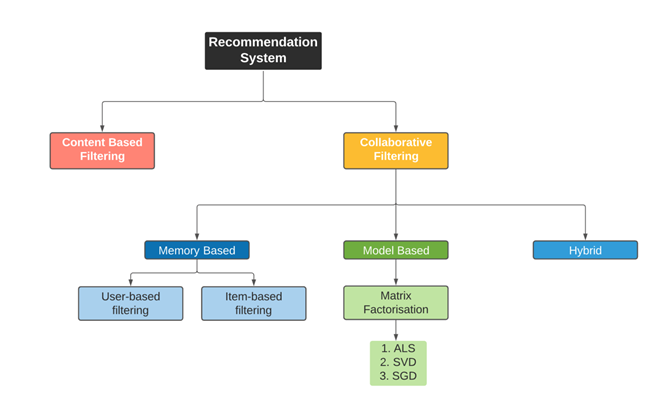

## Content based filtering

See [here](https://developers.google.com/machine-learning/recommendation/content-based/basics)

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

To demonstrate content-based filtering, let’s hand-engineer some features for the Google Play store. The following figure shows a feature matrix where each row represents an app and each column represents a feature. Features could include categories (such as Education, Casual, Health), the publisher of the app, and many others. To simplify, assume this feature matrix is binary: a non-zero value means the app has that feature.

You also represent the user in the same feature space. Some of the user-related features could be explicitly provided by the user. For example, a user selects "Entertainment apps" in their profile. Other features can be implicit, based on the apps they have previously installed. For example, the user installed another app published by Science R Us.

The model should recommend items relevant to this user. To do so, you must first pick a similarity metric (for example, dot product). Then, you must set up the system to score each candidate item according to this similarity metric. Note that the recommendations are specific to this user, as the model did not use any information about other users.

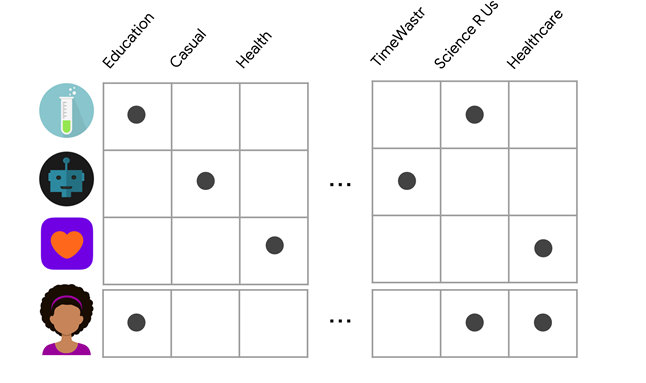

## User based collaborative filtering

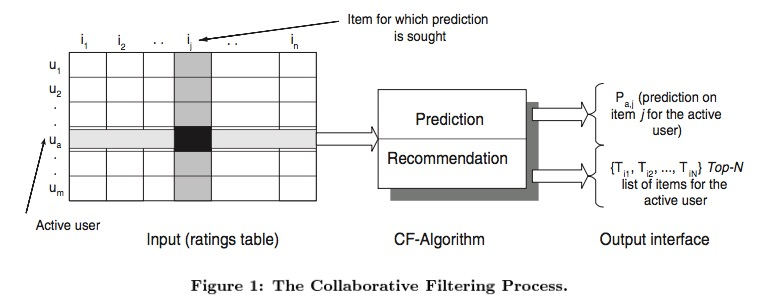

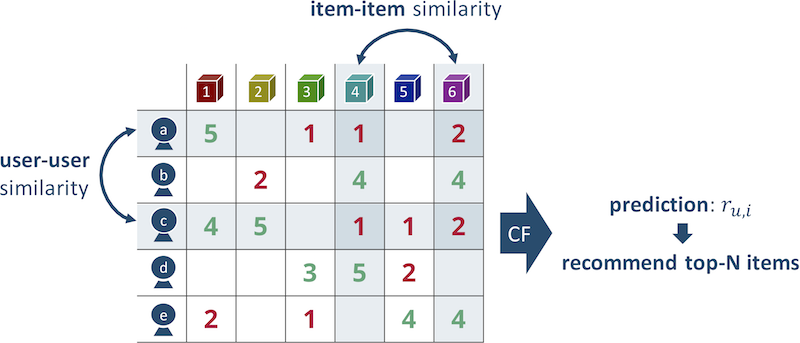

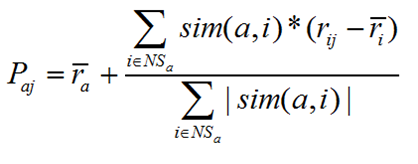

For active user, 'a', rating for jth item, $P_{aj}$ is given as above. Find similarity of active user with every other user,i :sim(a,i). Weigh user, i's, ratings for jth item with sim(a,i) ie *sim(a,i)* * ($r_{ij}$ - $\bar r$). 

## Item based collaborative filtering

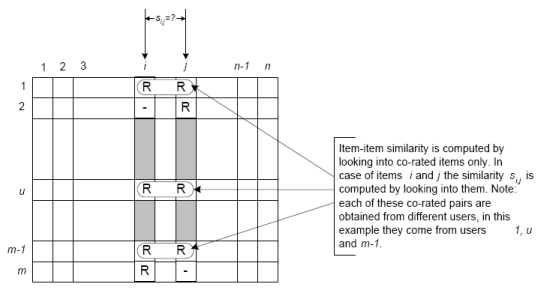

## Matrix factorization

### Matrix Multiplication

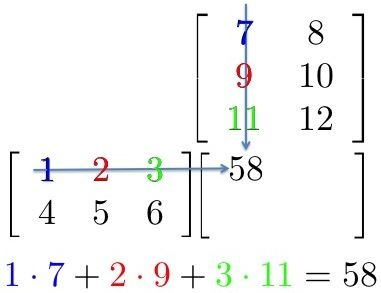

For every 'i', sum over all k (or columns).

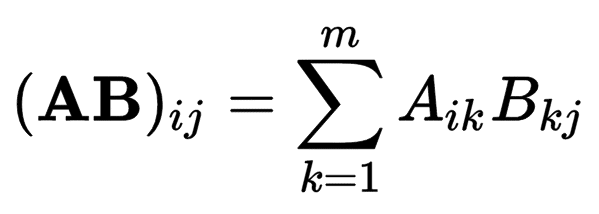

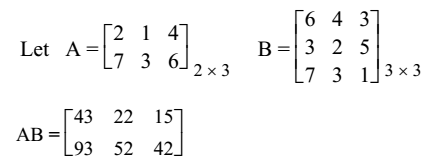

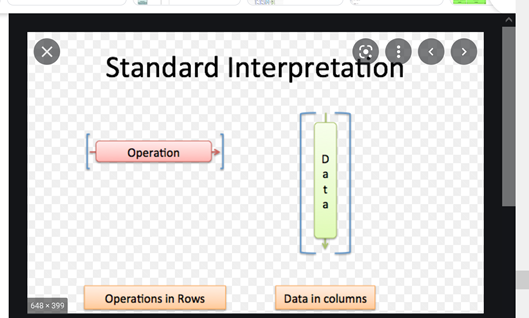

### Matric factorization
And latent features

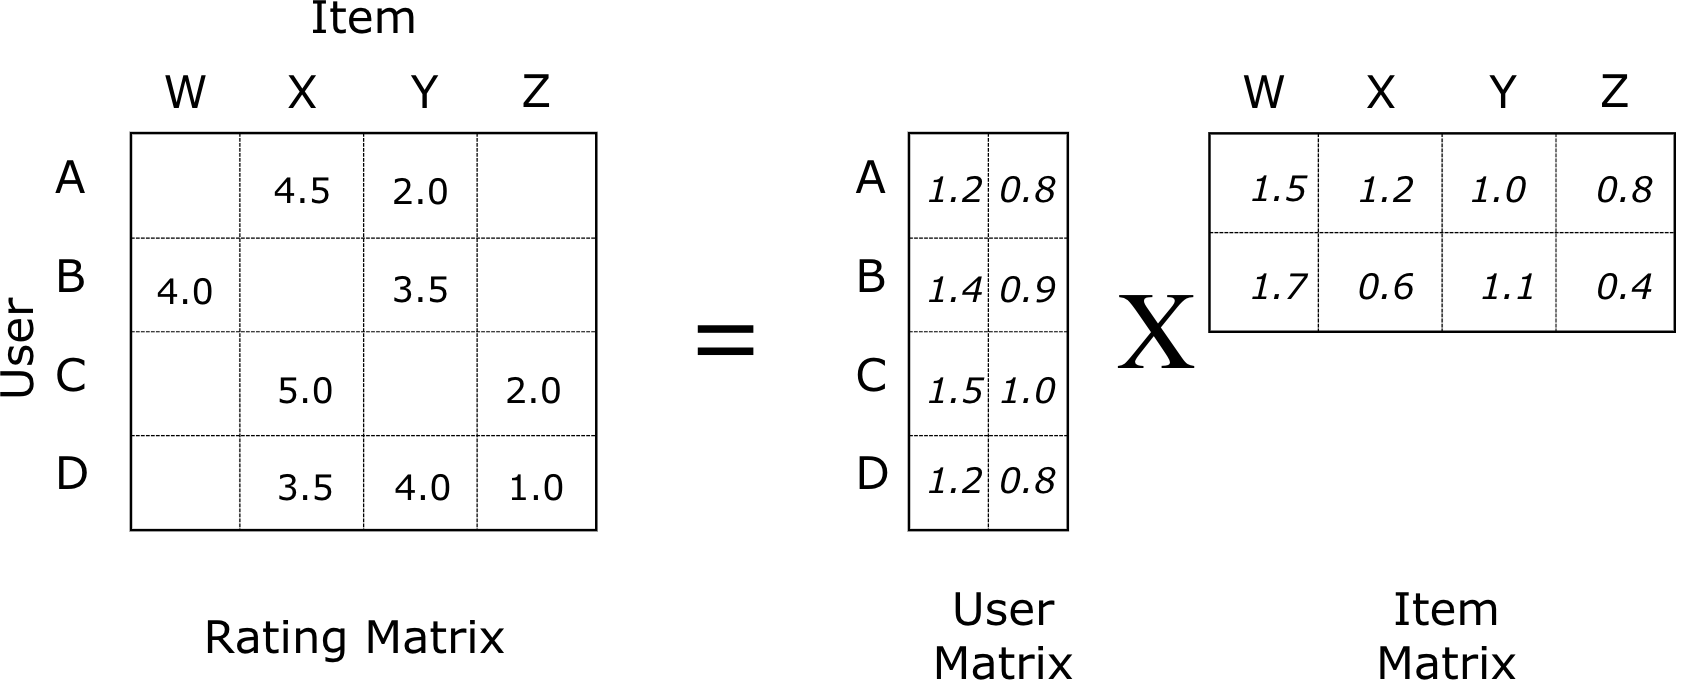

Given the *Rating Matrix*, we try to factor it in two matrices, *User Matrix* and *Item Matrix*. The two factors should be such that by multiplication of '*User Matrix*' and '*Item Matrix*', one is able to get back existing values in '*Rating Matrix*' as close as possible. When this is so, there is little reason to doubt that blank values in the *Rating Matrix* will also not be filled in with close to correct values.<br>

The two factor matricies, *User Matrix* and *Item Matrix* can be interpreted thus:  '*User Matrix*' is displaying  latent features (2 here) of users (row-wise). It also displays how much importance each user gives to each latent feature. For example, in the above diagram, we may say that the two features are *how much a user like to see thriller movies* and *how much each user likes to see romance movies*. User **A** likes 1.2 of thrill and 0.8 of romance.<br> <br>
Similarly, '*Item Matrix*' also has a set of latent features (2 here) and also how much of that feature is present in an item (column-wise). We may, for example, say how much of each movie has a *thrill component* and how much of *roamance component*. Movie **W** has, 1.5 of thrill and 1.7 of romance. Thus, user **'A's** rating for a movie will be his preference for thrill (1.2) and romance (0.8) weighted by what is contained in **W** ie `1.2 * 1.5 + 0.8 * 1.7 =  3.16`


It is possible to tune the expressive power of the model by changing the number of latent features. It has been demonstrated that a matrix factorization with one latent feature is equivalent to a most popular or top popular recommender (e.g. recommends the items with the most interactions without any personalization). Increasing the number of latent features will improve personalization, therefore recommendation quality, until the number of features becomes too high, at which point the model starts to overfit and the recommendation quality will decrease.

In Spark Matrix factorization is performed by ALS (Alternate Least Square) algorithm.

### Matrix factorization using Deep Learning
Matrix factorization can also be performed using Deep Learning. The conceptual diagram is as below. Conceptually, given userid and itemid as below:<br>

|userid|itemid|rating|
|------|------|-------|
|001|020|2.3|
|002|023|3.5|
|004|012|5.0|

Treat both *userid* and *itemid* as categorical. Feed them into embedding layers. At the simplest, concatenate the the output of embedding layers and feed this result into a classificatrion layer. The target is *'rating'* column. Please see [here](https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/recommender/neural_collaborative_filtering) for full NN code. 

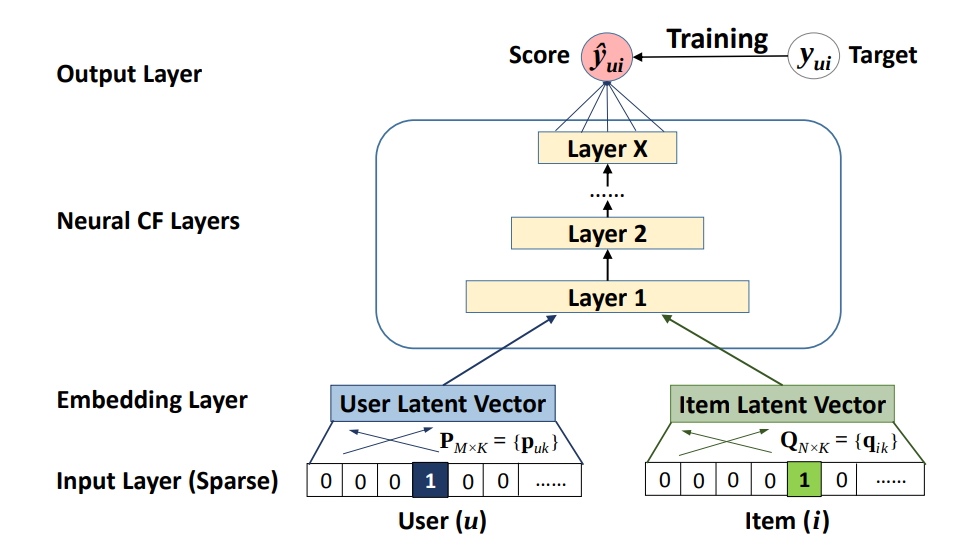

## Deep Cross Network
See this [link](https://www.tensorflow.org/recommenders/examples/dcn) for a toy example  
ToDo

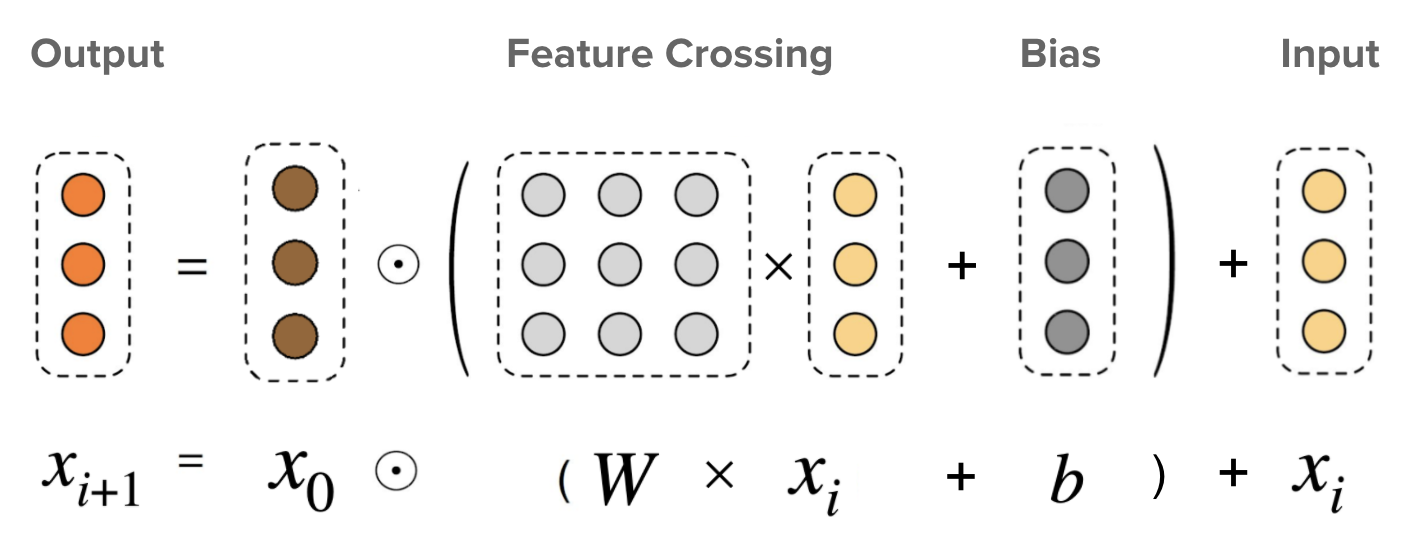

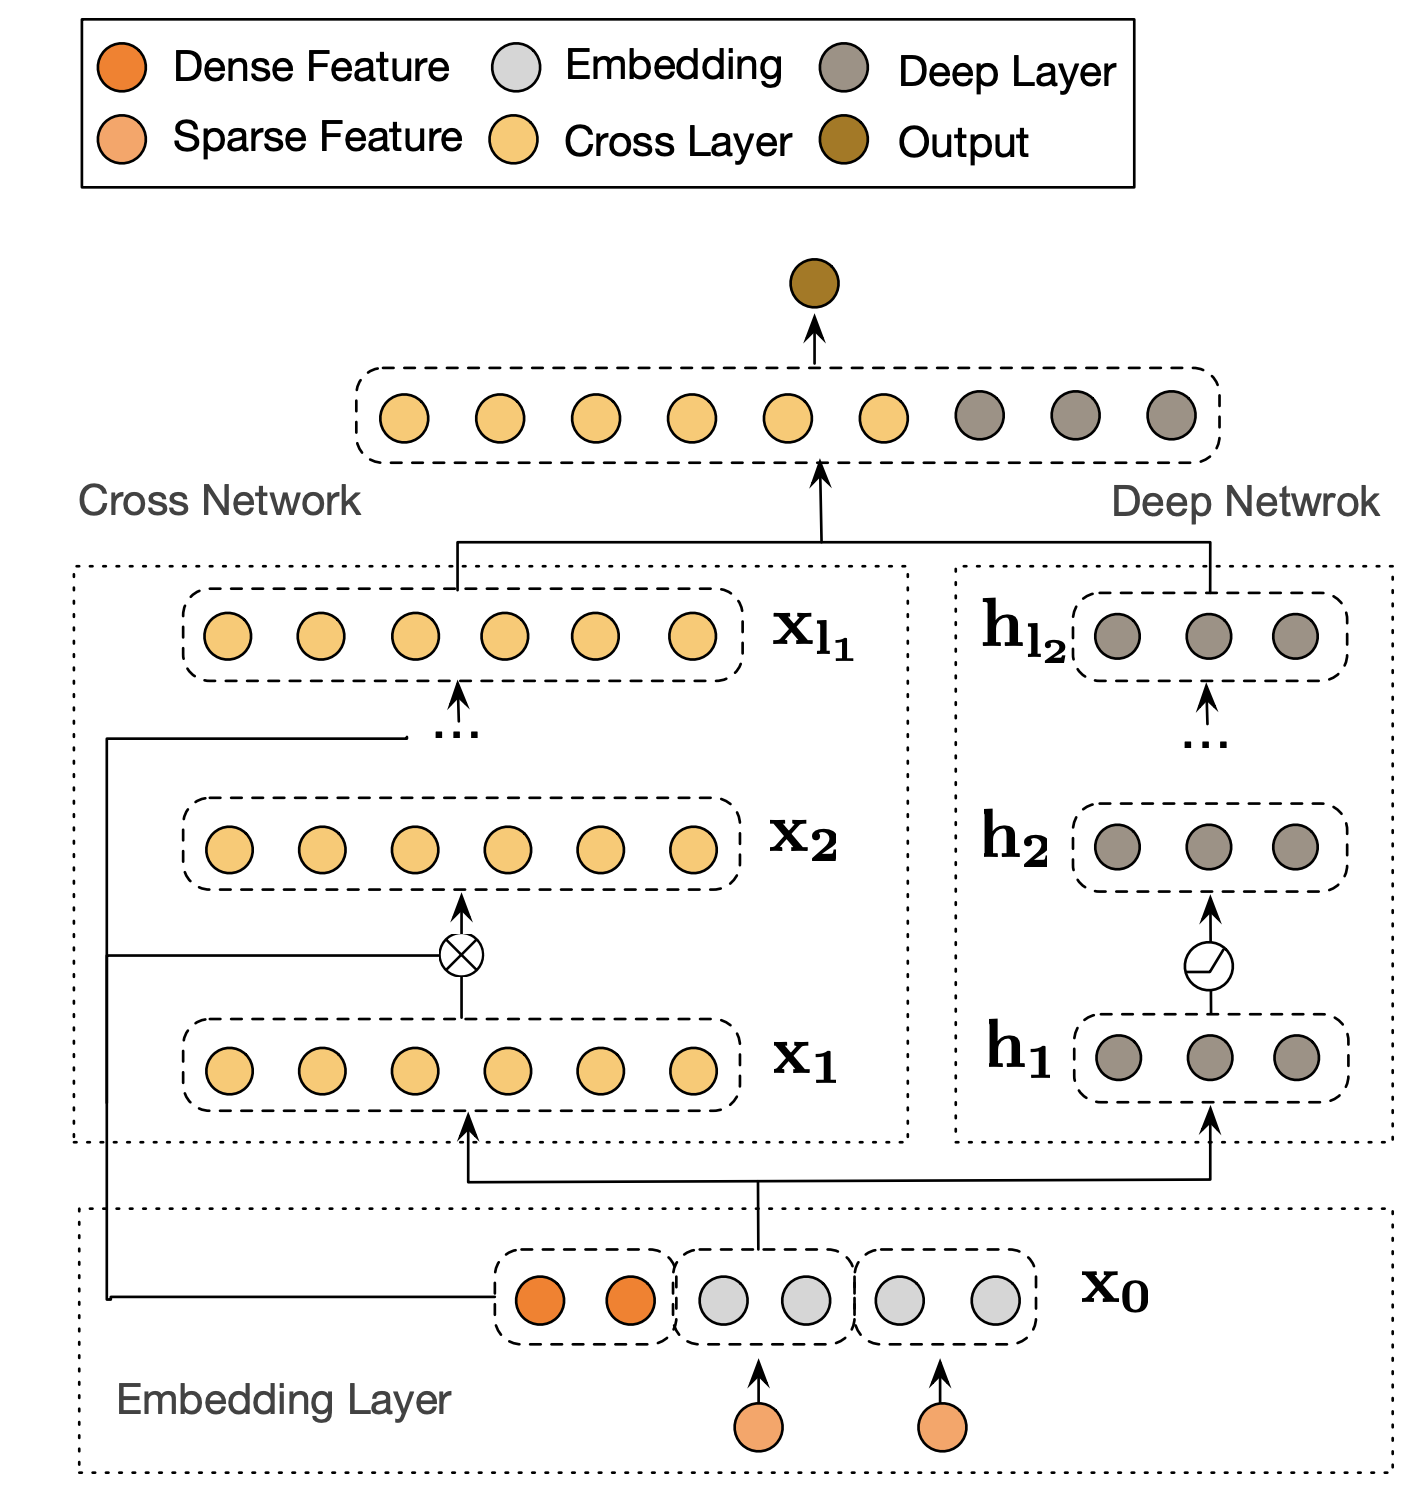

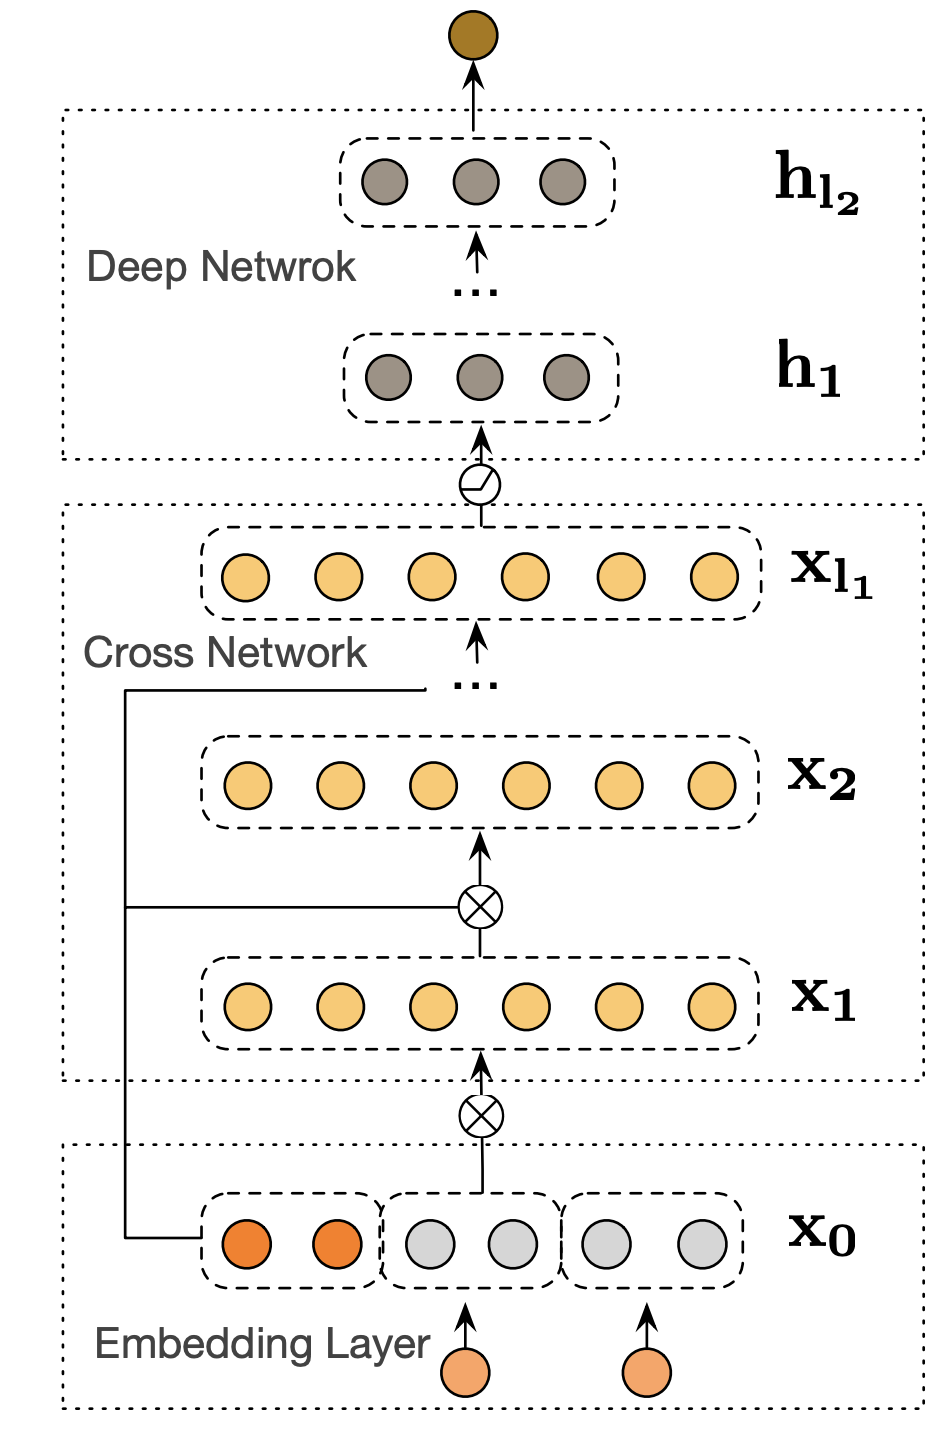

## Recommendation using implicit data

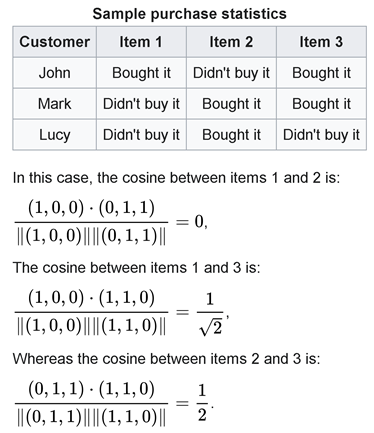

### ALS with implicit feedback
See [here](http://yifanhu.net/PUB/cf.pdf)

A common task of recommender systems is to improve
customer experience through personalized recommendations based on prior implicit feedback. These systems passively track different sorts of user behavior, such as purchase history, watching habits and browsing activity, in order to model user preferences. Unlike the much more extensively researched explicit feedback, we do not have any direct input from the users regarding their preferences. In particular, we lack substantial evidence on which products 
consumer dislike. In this work we identify unique properties of implicit feedback datasets. We propose treating the data as indication of positive and negative preference associated with vastly varying confidence levels. This leads to a factor model which is especially tailored for implicit feedback recommenders. We also suggest a scalable optimization procedure, which scales linearly with the data size. The algorithm is used successfully within a recommender system for television shows. It compares favorably with well tuned implementations of other known methods. In addition, we offer a novel way to give explanations to recommendations 
given by this factor model.

## Slope 1 Recommender Engine

Hence, a user visiting item 1 would receive item 3 as a recommendation, a user visiting item 2 would receive item 3 as a recommendation, and finally, a user visiting item 3 would receive item 1 (and then item 2) as a recommendation. The model uses a single parameter per pair of item (the cosine) to make the recommendation. 

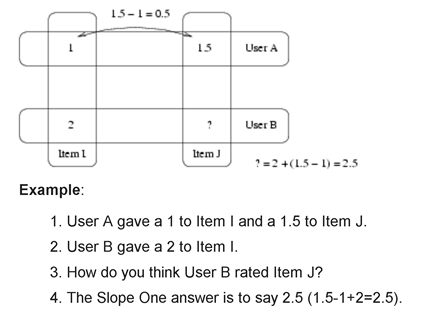

For a more realistic example, consider the following table. 

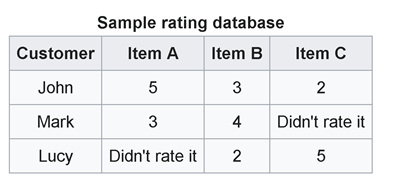

In this case, the average difference in ratings between item B and A is (2+(-1))/2=0.5. Hence, on average, item A is rated above item B by 0.5. Similarly, the average difference between item C and A is 3. Hence, if we attempt to predict the rating of Lucy for item A using her rating for item B, we get 2+0.5 = 2.5. Similarly, if we try to predict her rating for item A using her rating of item C, we get 5+3=8.

If a user rated several items, the predictions are simply combined using a weighted average where a good choice for the weight is the number of users having rated both items. In the above example, both John and Mark rated items A and B, hence weight of 2 and only John rated both items A and C, hence weight of 1 as shown below. we would predict the following rating for Lucy on item A as :

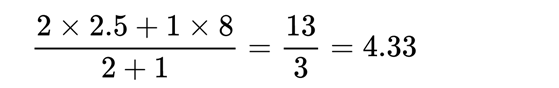

Hence, given n items, to implement Slope One, all that is needed is to compute and store the average differences and the number of common ratings for each of the n2 pairs of items. 

## Redcing candidates size

As number of items may be very very large, it is futile to look for similar items among all possible items. Better reduce candidate size. 

### Content based filtering

Here is user-item matrix.

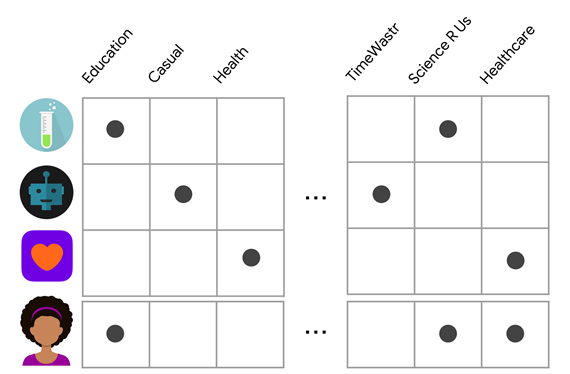

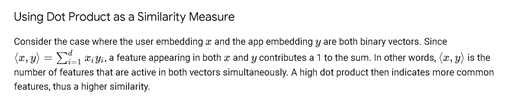

## Full spark install
> At times the download mirror for Apache Spark file `.tgz` is unavailable. If you get an error, please check if the download mirror is OK. <br>
> In case you are also changing the spark or hadoop version, same change will have to be made in the spark environment function. 
>> Call libraries<br>
>> Define some functions<br>
>> Install components: java,ssh, ssh-passphrase, environment<br>

### 1.0 Libraries

In [ ]:
# 1.0 How to set environment variable
import os  
import time  

### 2.0 Define some functions

#### ssh_install()

In [ ]:
# 2.0 Function to install ssh client and sshd (Server)
def ssh_install():
  print("\n--1. Download and install ssh server----\n")
  ! sudo apt-get remove openssh-client openssh-server
  ! sudo apt install openssh-client openssh-server
  
  print("\n--2. Restart ssh server----\n")
  ! service ssh restart

#### Java install

In [ ]:
# 3.0 Function to download and install java 8
def install_java():
  ! rm -rf /usr/java

  print("\n--Download and install Java 8----\n")
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null        # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     # set environment variable

  !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
  !update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac
  
  !mkdir -p /usr/java
  ! ln -s "/usr/lib/jvm/java-8-openjdk-amd64"  "/usr/java"
  ! mv "/usr/java/java-8-openjdk-amd64"  "/usr/java/latest"
  
  !java -version       #check java version
  !javac -version

#### setup ssh passphrase

In [ ]:
# 4.0 Function tp setup ssh passphrase
def set_keys():
  print("\n---22. Generate SSH keys----\n")
  ! cd ~ ; pwd 
  ! cd ~ ; ssh-keygen -t rsa -P '' -f ~/.ssh/id_rsa
  ! cd ~ ; cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
  ! cd ~ ; chmod 0600 ~/.ssh/authorized_keys


#### Set environment
Define a function to setup environment

In [ ]:
# 5.0 Function to set up environmental variables
def set_env():
  print("\n---23. Set Environment variables----\n")
  # 'export' command does not work in colab
  # https://stackoverflow.com/a/57240319
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"   
  

#### Function to install prerequisites
java and ssh<br>


In [ ]:
# 6.0 Function to call all functions
def install_components():
  print("\n--Install java----\n")
  ssh_install()
  install_java()  
  #set_keys()
  set_env()


### 3.0 Install components
Start downloading, install and configure. Takes around 2 minutes<br>
Your <u>input *'y'* is required </u>at one place while overwriting earlier ssh keys

In [ ]:
# 7.0 Start installation
start = time.time()
install_components()
end = time.time()
print("\n---Time taken----\n")
print((end- start)/60)


--Install java----


--1. Download and install ssh server----

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  ncurses-term python3-certifi python3-chardet python3-idna
  python3-pkg-resources python3-requests python3-six python3-urllib3
Use 'sudo apt autoremove' to remove them.
The following packages will be REMOVED:
  openssh-client openssh-server openssh-sftp-server ssh-import-id
0 upgraded, 0 newly installed, 4 to remove and 37 not upgraded.
After this operation, 5,240 kB disk space will be freed.
(Reading database ... 158574 files and directories currently installed.)
Removing openssh-server (1:7.6p1-4ubuntu0.5) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of stop.
Removing ssh-import-id (5.7-0ubuntu1.1) ...
Removing openssh-sftp-server (1:7.6p1-4ubuntu0.5) ...
Removing openssh-client (1:7.6p1-4ubuntu0

## 4.0 Install spark
koalas will also be installed

### 4.1 Define functions

`findspark`: PySpark isn't on `sys.path` by default, but that doesn't mean it can't be used as a regular library. You can address this by either symlinking pyspark into your site-packages, or adding `pyspark` to `sys.path` at runtime. `findspark` does the latter.

In [ ]:
# 8.0 Function to download and unzip spark
def spark_koalas_install():
  print("\n--1.1 Install findspark----\n")
  !pip install -q findspark

  print("\n--1.2 Install databricks Koalas----\n")
  !pip install koalas

  print("\n--1.3 Download Spark Apache tar.gz----\n")
  #! wget -c https://apachemirror.wuchna.com/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
  ! wget -c https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz 

  print("\n--1.4 Transfer downloaded content and unzip tar.gz----\n")
  !  mv /content/spark*   /opt/
  ! tar -xzf /opt/spark-3.1.2-bin-hadoop3.2.tgz  --directory /opt/

  print("\n--1.5 Check folder for files----\n")
  ! ls -la /opt


In [ ]:
# 9.0 Function to set environment
def set_spark_env():
  print("\n---2. Set Environment variables----\n")
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre" 
  os.environ["SPARK_HOME"] = "/opt/spark-3.1.2-bin-hadoop3.2"     
  os.environ["LD_LIBRARY_PATH"] += ":/opt/spark-3.1.2-bin-hadoop3.2/lib/native"
  os.environ["PATH"] += ":/opt/spark-3.1.2-bin-hadoop3.2/bin:/opt/spark-3.1.2-bin-hadoop3.2/sbin"
  print("\n---2.1. Check Environment variables----\n")
  # Check
  ! echo $PATH
  ! echo $LD_LIBRARY_PATH

In [ ]:
# 10.0 Function to configure spark 
def spark_conf():
  print("\n---3. Configure spark to access hadoop----\n")
  !mv /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh.template  /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh
  #!echo "HADOOP_CONF_DIR=/opt/hadoop-3.2.2/etc/hadoop/" >> /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh
  print("\n---3.1 Check ----\n")
  #!cat /opt/spark-3.1.1-bin-hadoop3.2/conf/spark-env.sh

### 4.2 Finally Install spark


In [ ]:
# 11.0 Call all the three functions
def install_spark():
  spark_koalas_install()
  set_spark_env()
  spark_conf()


In [ ]:
# 12
install_spark()


--1.1 Install findspark----


--1.2 Install databricks Koalas----

     |████████████████████████████████| 390 kB 33.2 MB/s 

--1.3 Download Spark Apache tar.gz----

--2021-11-16 13:25:04--  https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M   196MB/s    in 1.1s    

2021-11-16 13:25:05 (196 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]


--1.4 Transfer downloaded content and unzip tar.gz----


--1.5 Check folder for files----

total 223492
drwxr-xr-x  1 root root      4096 Nov 16 13:25 .
drwxr-xr-x  1 root root      4096 Nov 16 13:18 ..
drwxr-xr-x  1 root root      4096 Nov  1 13:28 google
drw

## 5.0 Mount gdrive


In [ ]:
# 5.0 Mount gdrive, if needed
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 5.1 Data source: https://grouplens.org/datasets/movielens/
#     Path to data folder:
pathToFolder = "/gdrive/MyDrive/Colab_data_files/movielens/"

## 6.0 Import libraries

In [ ]:
# 6.0 Just call some libraries to test
import pandas as pd
import numpy as np
import os
import time 

# 6.0.1 Get spark in sys.path
import findspark
findspark.init()

# 6.0.2 Call other spark libraries
#     Just to test
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode

### 6.1 Initiate spark session

In [ ]:
# 6.1
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Recommendations').getOrCreate()

## 7.0 Load data

In [ ]:
# 7.0
movies = spark.read.csv(path = pathToFolder + "movies.csv",
                        header=True,
                        inferSchema = True
                        )
# 7.0.1
ratings = spark.read.csv(path = pathToFolder + "ratings.csv",
                         header=True,
                         inferSchema = True)

In [ ]:
# 7.0.2
ratings.show()

In [ ]:
# 7.0.3
ratings.printSchema()

In [ ]:
# 7.1
ratings = ratings.\
                   withColumn('userId', col('userId').cast('integer')).\
                   withColumn('movieId', col('movieId').cast('integer')).\
                   withColumn('rating', col('rating').cast('float')).\
                   drop('timestamp')
ratings.show()

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|      1|   4.0|
|     1|      3|   4.0|
|     1|      6|   4.0|
|     1|     47|   5.0|
|     1|     50|   5.0|
|     1|     70|   3.0|
|     1|    101|   5.0|
|     1|    110|   4.0|
|     1|    151|   5.0|
|     1|    157|   5.0|
|     1|    163|   5.0|
|     1|    216|   5.0|
|     1|    223|   3.0|
|     1|    231|   5.0|
|     1|    235|   4.0|
|     1|    260|   5.0|
|     1|    296|   3.0|
|     1|    316|   3.0|
|     1|    333|   5.0|
|     1|    349|   4.0|
+------+-------+------+
only showing top 20 rows



## 8.0 Calculate sparsity
` Sparsity = 1 - (Total_no_of_ratings)/(no_of_movies * no_of_ users) `

In [ ]:
# 8.1 Count the total number of ratings in the dataset:

numerator = ratings.select("rating").count()

# 8.2 Count the number of distinct userIds and distinct movieIds:

num_users = ratings.select("userId").distinct().count()
num_movies = ratings.select("movieId").distinct().count()

# 8.3 Set the denominator equal to the number of 
#      users multiplied by the number of movies:

denominator = num_users * num_movies

# 8.4 Divide the numerator by the denominator:

sparsity = np.round((1.0 - (numerator *1.0)/denominator)*100, 2)

f"The ratings dataframe is {sparsity}% empty"

'The ratings dataframe is 98.3% empty'

## 9.0 Interpret ratings

In [ ]:
# 9.1 Per user no of ratings
#      Group data by userId, count ratings:

userId_ratings = ratings.groupBy("userId").count().orderBy('count', ascending=False)
userId_ratings.show()

+------+-----+
|userId|count|
+------+-----+
|   414| 2698|
|   599| 2478|
|   474| 2108|
|   448| 1864|
|   274| 1346|
|   610| 1302|
|    68| 1260|
|   380| 1218|
|   606| 1115|
|   288| 1055|
|   249| 1046|
|   387| 1027|
|   182|  977|
|   307|  975|
|   603|  943|
|   298|  939|
|   177|  904|
|   318|  879|
|   232|  862|
|   480|  836|
+------+-----+
only showing top 20 rows



In [ ]:
# 9.2 Per movie no of ratings:
#      Group data by movieId, count ratings

movieId_ratings = ratings.groupBy("movieId").count().orderBy('count', ascending=False)
movieId_ratings.show()

+-------+-----+
|movieId|count|
+-------+-----+
|    356|  329|
|    318|  317|
|    296|  307|
|    593|  279|
|   2571|  278|
|    260|  251|
|    480|  238|
|    110|  237|
|    589|  224|
|    527|  220|
|   2959|  218|
|      1|  215|
|   1196|  211|
|   2858|  204|
|     50|  204|
|     47|  203|
|    780|  202|
|    150|  201|
|   1198|  200|
|   4993|  198|
+-------+-----+
only showing top 20 rows



## 10.0 Build Out An ALS Model
See [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.recommendation.ALS.html) for syntax and [here](https://spark.apache.org/docs/2.2.0/ml-collaborative-filtering.html) for usage and other details.

In [ ]:
# 10.0 Import the required functions
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
# 10.1 Create test and train set
(train, test) = ratings.randomSplit([0.8, 0.2], seed = 1234)

train.count()
test.count()

19989

In [ ]:
# 10.2 Create ALS model
als = ALS(
            userCol="userId",
            itemCol="movieId",
            ratingCol="rating",
            nonnegative = True,
            implicitPrefs = False,
            coldStartStrategy="drop"
          )

# 10.2.1 Confirm that a model called "als" was created
type(als)

pyspark.ml.recommendation.ALS

## 11.0 Tell Spark how to tune your ALS model

In [ ]:
# 11.0 Import the requisite items
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
# 11.1 Add hyperparameters and their respective values to param_grid
param_grid = ParamGridBuilder() \
            .addGrid(als.rank, [10, 50, 100]) \
            .addGrid(als.regParam, [.01, .1, .15]) \
            .build()
            #             .addGrid(als.maxIter, [5, 50, 100, 200]) \
print ("Num models to be tested: ", len(param_grid))

Num models to be tested:  9


In [ ]:
# 11.2 Can have a look at parameters:
param_grid[:4]  # A list

[{Param(parent='ALS_c916ad5fad83', name='rank', doc='rank of the factorization'): 10,
  Param(parent='ALS_c916ad5fad83', name='regParam', doc='regularization parameter (>= 0).'): 0.01},
 {Param(parent='ALS_c916ad5fad83', name='rank', doc='rank of the factorization'): 10,
  Param(parent='ALS_c916ad5fad83', name='regParam', doc='regularization parameter (>= 0).'): 0.1},
 {Param(parent='ALS_c916ad5fad83', name='rank', doc='rank of the factorization'): 10,
  Param(parent='ALS_c916ad5fad83', name='regParam', doc='regularization parameter (>= 0).'): 0.15},
 {Param(parent='ALS_c916ad5fad83', name='rank', doc='rank of the factorization'): 50,
  Param(parent='ALS_c916ad5fad83', name='regParam', doc='regularization parameter (>= 0).'): 0.01}]

In [ ]:
# Add hyperparameters and their respective values to param_grid
#param_grid = ParamGridBuilder() \
#            .addGrid(als.rank, [10, 50, 100, 150]) \
#            .addGrid(als.regParam, [.01, .05, .1, .15]) \
#            .build()
            #             .addGrid(als.maxIter, [5, 50, 100, 200]) \
# print ("Num models to be tested: ", len(param_grid))

Num models to be tested:  16


In [ ]:
# 11.3 Define evaluator as RMSE and print length of evaluator

evaluator = RegressionEvaluator(
                                 metricName="rmse",
                                 labelCol="rating",
                                 predictionCol="prediction"
                                ) 


## 12.0 Build your cross validation pipeline

In [ ]:
# 12.0 Build cross validation using CrossValidator
cv = CrossValidator(
                     estimator=als,
                     estimatorParamMaps=param_grid,
                     evaluator=evaluator,
                     numFolds=3
                    )

# 12.1 Confirm cv was built
print(cv)

CrossValidator_49563fd156dc


## 13.0 Best Model and Best Model Parameters

In [ ]:
%%time
# Takes 15 minutes

# 13.0 Fit cross validator to the 'train' dataset
model = cv.fit(train)



CPU times: user 5.12 s, sys: 738 ms, total: 5.86 s
Wall time: 11min 36s


In [ ]:
#13.1 Extract best model from the cv model above

best_model = model.bestModel

In [ ]:
# 13.2 Print best_model
print(type(best_model))

# 13.3 Complete the code below to extract the ALS model parameters
print("**Best Model**")

#13.4 Print "Rank"
print("  Rank:", best_model._java_obj.parent().getRank())

# 13.5 Print "MaxIter"
print("  MaxIter:", best_model._java_obj.parent().getMaxIter())

# 13.6 Print "RegParam"
print("  RegParam:", best_model._java_obj.parent().getRegParam())

<class 'pyspark.ml.recommendation.ALSModel'>
**Best Model**
  Rank: 100
  MaxIter: 10
  RegParam: 0.15


In [ ]:
# 13.7 View the predictions
test_predictions = best_model.transform(test)
RMSE = evaluator.evaluate(test_predictions)
print(RMSE)

0.8687112454151723


In [ ]:
13.7.1 
test_predictions.show()

+------+-------+------+----------+
|userId|movieId|rating|prediction|
+------+-------+------+----------+
|   597|    471|   2.0|  4.098993|
|   436|    471|   3.0|  3.575642|
|   218|    471|   4.0| 3.0278594|
|   387|    471|   3.0| 3.0416205|
|   217|    471|   2.0| 2.8126268|
|   287|    471|   4.5|  2.756206|
|    32|    471|   3.0| 3.7312999|
|   260|    471|   4.5|  3.518203|
|   104|    471|   4.5| 3.5471277|
|   111|   1088|   3.0| 3.2949471|
|   177|   1088|   3.5| 3.5987847|
|    41|   1088|   1.5| 2.6150675|
|   387|   1088|   1.5| 2.6378942|
|   594|   1088|   4.5|  4.418486|
|   307|   1088|   3.0| 2.6604629|
|   509|   1088|   3.0| 3.1693258|
|   104|   1088|   3.0| 3.6681716|
|   268|   1238|   5.0| 3.7485669|
|   462|   1238|   3.5|  3.492259|
|   307|   1342|   2.0| 2.3023176|
+------+-------+------+----------+
only showing top 20 rows



## 14.0 Make Recommendations

In [ ]:
# 14.0 Generate n Recommendations for all users

nrecommendations = best_model.recommendForAllUsers(10)
nrecommendations.limit(10).show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|   471|[{3379, 4.8097334...|
|   463|[{3379, 4.9766603...|
|   496|[{3379, 4.426479}...|
|   148|[{33649, 4.509625...|
|   540|[{3379, 5.373408}...|
|   392|[{3379, 4.7047763...|
|   243|[{3379, 5.660039}...|
|    31|[{33649, 5.047087...|
|   516|[{4429, 4.811718}...|
|   580|[{3379, 4.7442946...|
+------+--------------------+



In [ ]:
# 14.1
nrecommendations = nrecommendations\
    .withColumn("rec_exp", explode("recommendations"))\
    .select('userId', col("rec_exp.movieId"), col("rec_exp.rating"))

nrecommendations.limit(10).show()

+------+-------+---------+
|userId|movieId|   rating|
+------+-------+---------+
|   471|   3379|4.8097334|
|   471|   8477| 4.522078|
|   471|   7096|  4.50545|
|   471| 171495|  4.50294|
|   471|  33649| 4.496335|
|   471|  86781|4.4535975|
|   471|  78836|4.4212112|
|   471| 177593|4.4000983|
|   471| 100714| 4.389506|
|   471| 117531|4.3847747|
+------+-------+---------+



## 15.0 Do the recommendations make sense?
Lets merge movie name and genres to teh recommendation matrix for interpretability.

In [ ]:
# 15.0 
nrecommendations.join(movies, on='movieId').filter('userId = 100').show()

+-------+------+---------+--------------------+--------------------+
|movieId|userId|   rating|               title|              genres|
+-------+------+---------+--------------------+--------------------+
|  67618|   100|5.1405735|Strictly Sexual (...|Comedy|Drama|Romance|
|   3379|   100| 5.006642| On the Beach (1959)|               Drama|
|  33649|   100|5.0065255|  Saving Face (2004)|Comedy|Drama|Romance|
|  42730|   100|4.9775596|   Glory Road (2006)|               Drama|
|  74282|   100| 4.915519|Anne of Green Gab...|Children|Drama|Ro...|
|  26073|   100| 4.874221|Human Condition I...|           Drama|War|
| 184245|   100| 4.874221|De platte jungle ...|         Documentary|
|  84273|   100| 4.874221|Zeitgeist: Moving...|         Documentary|
|   7071|   100| 4.874221|Woman Under the I...|               Drama|
| 117531|   100| 4.874221|    Watermark (2014)|         Documentary|
+-------+------+---------+--------------------+--------------------+



In [ ]:
# 15.1
ratings.join(movies, on='movieId').filter('userId = 100').sort('rating', ascending=False).limit(10).show()

+-------+------+------+--------------------+--------------------+
|movieId|userId|rating|               title|              genres|
+-------+------+------+--------------------+--------------------+
|   1101|   100|   5.0|      Top Gun (1986)|      Action|Romance|
|   1958|   100|   5.0|Terms of Endearme...|        Comedy|Drama|
|   2423|   100|   5.0|Christmas Vacatio...|              Comedy|
|   4041|   100|   5.0|Officer and a Gen...|       Drama|Romance|
|   5620|   100|   5.0|Sweet Home Alabam...|      Comedy|Romance|
|    368|   100|   4.5|     Maverick (1994)|Adventure|Comedy|...|
|    934|   100|   4.5|Father of the Bri...|              Comedy|
|    539|   100|   4.5|Sleepless in Seat...|Comedy|Drama|Romance|
|     16|   100|   4.5|       Casino (1995)|         Crime|Drama|
|    553|   100|   4.5|    Tombstone (1993)|Action|Drama|Western|
+-------+------+------+--------------------+--------------------+



In [ ]:
########## I am Done ###########